<a href="https://colab.research.google.com/github/Brian13Noble/GIS/blob/main/ps2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Research Purpose**
The goal of this research was to investigate the impact of the increase in population on the education in Kenya. Specifically, I was interested in understanding how the population growth affects the new Competence Based Curriculum whose implementation is in progress. Presumably, population growth signficantly affects education on the account that it increases the enrollment rates in public schools, which leads to congestion and scramble for insufficient learning resources.    

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis
#!pip install geopandas matplotlib folium

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
!pip install mapclassify
import mapclassify #need for thematic map classification

credit_license.txt			ken_admbnda_adm2_iebc_20191031.shx
drive					ken_admbndl_admALL_iebc_itos_20191031.CPG
ken_admbnda_adm0_iebc_20191031.sbn	ken_admbndp_admALL_iebc_itos_20191031.sbn
ken_admbnda_adm0_iebc_20191031.sbx	ken_admbndp_admALL_iebc_itos_20191031.sbx
ken_admbnda_adm0_iebc_20191031.shp	ken_admbndt_adminUnitLookup.dbf
ken_admbnda_adm0_iebc_20191031.shp.xml	kenya_administrative_province_boundaries.dbf
ken_admbnda_adm0_iebc_20191031.shx	kenya_administrative_province_boundaries.shp
ken_admbnda_adm1_iebc_20191031.CPG	kenya_administrative_province_boundaries.shx
ken_admbnda_adm1_iebc_20191031.dbf	kenya_administrative_province_boundaries.zip
ken_admbnda_adm1_iebc_20191031.prj	kenya_boundaries.zip
ken_admbnda_adm1_iebc_20191031.sbn	kenya_counties.zip
ken_admbnda_adm1_iebc_20191031.sbx	kenya_county_boundary.cst
ken_admbnda_adm1_iebc_20191031.shp	kenya_county_boundary.dbf
ken_admbnda_adm1_iebc_20191031.shp.xml	kenya_county_boundary.prj
ken_admbnda_adm1_iebc_20191031.shx	kenya_county_bo

<Axes: >

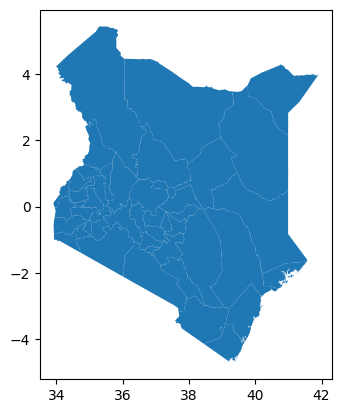

In [ ]:
! wget -q -O kenya_counties.zip 'https://github.com/Brian13Noble/GIS/blob/main/kenya_county_boundary.zip'
!ls
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Datasets/kenya_county_boundary.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
kenya_counties=gpd.read_file('kenya_county_boundary.shp') #load the shapefile with gpd as kenya_counties
#Make the map
kenya_counties.plot()

In [ ]:
kenya_counties.dtypes

OBJECTID       float64
AREA_          float64
PERIMETER      float64
COUNTY3_       float64
COUNTY3_ID     float64
COUNTY          object
Shape_Leng     float64
Shape_area     float64
Shape_len      float64
geometry      geometry
dtype: object

In [ ]:
#from google.colab import drive
#drive.mount("/content/drive")
sec_enrollment = "/content/drive/MyDrive/Datasets/number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv"
sec_enrollment = pd.read_csv(sec_enrollment)
sec_enrollment

,County,2007,2008,2009,2010,2011,2012,2013
0,BARINGO,17157,19419,21406,24034,25343,27803,30606
1,BOMET,26413,29895,32954,36999,38997,42812,46556
2,BUNGOMA,53867,60969,67208,75458,78835,87557,95673
3,BUSIA,21524,24362,26855,30152,31398,35308,38710
4,ELGEYO MARAKWET,14676,16610,18310,20558,21981,24000,26238
5,EMBU,22488,25453,28058,31502,34494,35752,39293
6,GARISSA,4694,5313,5856,6575,6641,7606,8262
7,HOMABAY,39085,44238,48765,54751,56972,63569,70177
8,ISIOLO,2002,2266,2498,2805,2814,3309,3707
9,KAJIADO,9470,10718,11815,13265,13929,15538,16879


In [ ]:
sec_enrollment.dtypes


County    object
2007       int64
2008       int64
2009       int64
2010       int64
2011       int64
2012       int64
2013       int64
dtype: object

In [ ]:
#Focus on no.of sec-school enrolment in 2007 and 2013
sec_enrollment= sec_enrollment[['County','2007','2013']]
sec_enrollment= sec_enrollment.iloc[1:,:]
sec_enrollment

,County,2007,2013
1,BOMET,26413,46556
2,BUNGOMA,53867,95673
3,BUSIA,21524,38710
4,ELGEYO MARAKWET,14676,26238
5,EMBU,22488,39293
6,GARISSA,4694,8262
7,HOMABAY,39085,70177
8,ISIOLO,2002,3707
9,KAJIADO,9470,16879
10,KAKAMEGA,61489,109500


In [ ]:
#Calculate the enrollment change percentage between 2007 and 2013
sec_enrollment['ECHANGE'] = (sec_enrollment['2013'] - sec_enrollment['2007'])  / sec_enrollment['2013'] * 100
print(sec_enrollment)

             County   2007    2013    ECHANGE
1             BOMET  26413   46556  43.266174
2           BUNGOMA  53867   95673  43.696759
3             BUSIA  21524   38710  44.396797
4   ELGEYO MARAKWET  14676   26238  44.065859
5              EMBU  22488   39293  42.768432
6           GARISSA   4694    8262  43.185669
7           HOMABAY  39085   70177  44.305114
8            ISIOLO   2002    3707  45.994065
9           KAJIADO   9470   16879  43.894780
10         KAKAMEGA  61489  109500  43.845662
11          KERICHO  28393   50254  43.501015
12           KIAMBU  58410  103284  43.447194
13           KILIFI  22339   39957  44.092399
14        KIRINYAGA  22287   39412  43.451233
15            KISII  63499  106590  40.426869
16           KISUMU  36014   64886  44.496502
17            KITUI  37945   66788  43.185902
18            KWALE  14104   25990  45.732974
19         LAIKIPIA  14484   25777  43.810374
20             LAMU   2982    5273  43.447753
21         MACHAKOS  48280   85463

In [ ]:
sec_enrollment

,County,2007,2013,ECHANGE
1,BOMET,26413,46556,43.266174
2,BUNGOMA,53867,95673,43.696759
3,BUSIA,21524,38710,44.396797
4,ELGEYO MARAKWET,14676,26238,44.065859
5,EMBU,22488,39293,42.768432
6,GARISSA,4694,8262,43.185669
7,HOMABAY,39085,70177,44.305114
8,ISIOLO,2002,3707,45.994065
9,KAJIADO,9470,16879,43.894780
10,KAKAMEGA,61489,109500,43.845662


In [ ]:
sec_enrollment['County'] = sec_enrollment['County'].str.capitalize()
sec_enrollment

,County,2007,2013,ECHANGE
1,Bomet,26413,46556,43.266174
2,Bungoma,53867,95673,43.696759
3,Busia,21524,38710,44.396797
4,Elgeyo marakwet,14676,26238,44.065859
5,Embu,22488,39293,42.768432
6,Garissa,4694,8262,43.185669
7,Homabay,39085,70177,44.305114
8,Isiolo,2002,3707,45.994065
9,Kajiado,9470,16879,43.894780
10,Kakamega,61489,109500,43.845662


In [ ]:
kenya_counties = pd.merge(
    left=kenya_counties,
    right=sec_enrollment,
    left_on='COUNTY',
    right_on='County',
    how='outer'
)

In [ ]:
#print(kenya_counties.info())

In [ ]:
#kenya_counties.head(1)

<Axes: >

Text(0.5, 1.0, 'Enrollment in Kenyan Secondary Schools in 2013')

<function matplotlib.pyplot.show(close=None, block=None)>

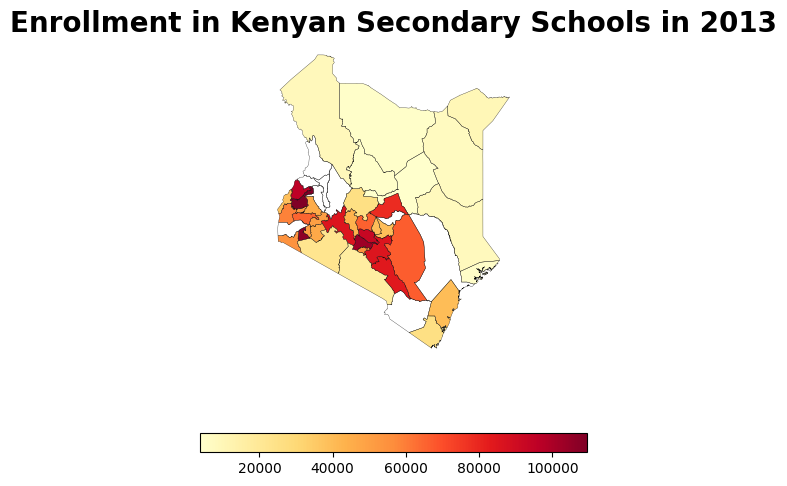

In [ ]:
ax = kenya_counties.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10, 6))
kenya_counties.plot(ax=ax, column='2013', legend=True, cmap='YlOrRd', legend_kwds={'shrink':0.5,
 'orientation': 'horizontal', 'format': '%.0f'})
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)
ax.set_title('Enrollment in Kenyan Secondary Schools in 2013', size=20, weight='bold')
plt.show


From the map above, it is evident that there was a significant increase in the number of enrollments in secondary schools in Kenya in 2013 when compared to the preceeding years. The increase in number of students enrolled in secondary schools has been consistent until 2023, considering that, over the years the government introduced various policies such as the 100 percent transition that aimed at ensuring all the students completing primary level education were given an equal opportunity of accessing the secondary education. Additionally, the increase in enrollement can be attributed to the rise in overall population. The rise in enrollment raises the question of sufficiency and accessibility to learning resources by students. Therefore one of the challenges facing CBC revolves around the signficant rise in enrollment rates in schools, which exerts pressure in schools and definitely overwhelms the teachers and school management.         

In [281]:
kenya_pop = "/content/drive/MyDrive/Datasets/2019-population_census-report-per-county.csv"
kenya_pop = pd.read_csv(kenya_pop)
kenya_pop


,County,Total_Population19,Male populatio 2019,Female population 2019,Households,Av_HH_Size,LandArea,Population Density,Population in 2009,Pop_change,Intersex population 2019
0,Baringo,"666,763","336,322","330,428","142,518",5,"10,976",61,"555,561","111,202",13
1,Bomet,"875,689","434,287","441,379","187,641",5,"2,531",346,"724,186","151,503",23
2,Bungoma,"1,670,570","812,146","858,389","358,796",5,"3,024",552,"1,630,934","39,636",35
3,Busia,"893,681","426,252","467,401","198,152",5,"1,696",527,"488,075","405,606",28
4,Elgeyo-Marakwet,"454,480","227,317","227,151","99,861",5,"3,032",150,"369,998","84,482",12
5,Embu,"608,599","304,208","304,367","182,743",3,"2,821",216,"516,212","92,387",24
6,Garissa,"841,353","458,975","382,344","141,394",6,"44,736",19,"623,060","218,293",34
7,Homa Bay,"1,131,950","539,560","592,367","262,036",4,"3,153",359,"963,794","168,156",23
8,Isiolo,"268,002","139,510","128,483","58,072",5,"25,350",11,"143,294","124,708",9
9,Kajiado,"1,117,840","557,098","560,704","316,179",4,"21,871",51,"687,312","430,528",38


In [282]:
kenya_pop.dtypes

County                      object
Total_Population19          object
Male populatio 2019         object
Female population 2019      object
Households                  object
Av_HH_Size                   int64
LandArea                    object
Population Density          object
Population in 2009          object
Pop_change                  object
Intersex population 2019     int64
dtype: object

In [283]:
kenya_pop.rename(columns={'Population in 2009': 'Total_Population09'}, inplace=True)
kenya_pop.rename(columns={'Population Density': 'Population_Density'}, inplace=True)

In [284]:
kenya_pop.dtypes

County                      object
Total_Population19          object
Male populatio 2019         object
Female population 2019      object
Households                  object
Av_HH_Size                   int64
LandArea                    object
Population_Density          object
Total_Population09          object
Pop_change                  object
Intersex population 2019     int64
dtype: object

In [285]:
#Focus on important population variables
kenya_pop= kenya_pop[['County','Total_Population09', 'Total_Population19','LandArea','Population_Density']]
kenya_pop= kenya_pop.iloc[1:,:]
kenya_pop

,County,Total_Population09,Total_Population19,LandArea,Population_Density
1,Bomet,"724,186","875,689","2,531",346
2,Bungoma,"1,630,934","1,670,570","3,024",552
3,Busia,"488,075","893,681","1,696",527
4,Elgeyo-Marakwet,"369,998","454,480","3,032",150
5,Embu,"516,212","608,599","2,821",216
6,Garissa,"623,060","841,353","44,736",19
7,Homa Bay,"963,794","1,131,950","3,153",359
8,Isiolo,"143,294","268,002","25,350",11
9,Kajiado,"687,312","1,117,840","21,871",51
10,Kakamega,"1,660,651","1,867,579","3,020",618


In [286]:
kenya_pop['Total_Population19'] = kenya_pop['Total_Population19'].str.replace(',', '').astype('int')
kenya_pop['LandArea'] = kenya_pop['LandArea'].str.replace(',', '').astype('int')
kenya_pop['Total_Population09'] = kenya_pop['Total_Population09'].str.replace(',', '').astype('int')
kenya_pop['Population_Density'] = kenya_pop['Population_Density'].str.replace(',', '').astype('int')

In [287]:
#kenya_pop.dtypes

In [288]:
kenya_pop['pop_change'] = (kenya_pop['Total_Population19'] - kenya_pop['Total_Population09'])  / kenya_pop['Total_Population19'] * 100

In [289]:
kenya_pop

,County,Total_Population09,Total_Population19,LandArea,Population_Density,pop_change
1,Bomet,724186,875689,2531,346,17.301005
2,Bungoma,1630934,1670570,3024,552,2.372603
3,Busia,488075,893681,1696,527,45.385993
4,Elgeyo-Marakwet,369998,454480,3032,150,18.588717
5,Embu,516212,608599,2821,216,15.180275
6,Garissa,623060,841353,44736,19,25.945471
7,Homa Bay,963794,1131950,3153,359,14.855426
8,Isiolo,143294,268002,25350,11,46.532489
9,Kajiado,687312,1117840,21871,51,38.514278
10,Kakamega,1660651,1867579,3020,618,11.080013


In [290]:
kenya_counties = pd.merge(
    left=kenya_counties,
    right=kenya_pop,
    left_on='COUNTY',
    right_on='County',
    how='outer'
)

In [ ]:
#print(kenya_counties.info())

<Axes: >

Text(0.5, 1.0, 'Population Density in Kenya in 2019 (pers/sq km)')

<function matplotlib.pyplot.show(close=None, block=None)>

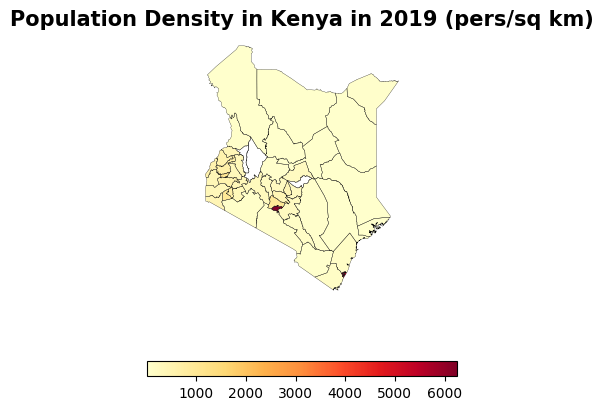

In [291]:
ax = kenya_counties.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(20, 5))
kenya_counties.plot(ax=ax, column='Population_Density', legend=True, cmap='YlOrRd', legend_kwds={'shrink':0.2,
 'orientation': 'horizontal', 'format': '%.0f'})
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)
ax.set_title('Population Density in Kenya in 2019 (pers/sq km)', size=15, weight='bold')
plt.show

The map shows the skewed distribution of population, which reflects in many schools in kenya. Notably, there are densey and sparsely populated regions in Kenya. Sparsely populated areas are mostly affected by insecurity, prolonged drought, and poor infrastructure. Such factors pose a great challenge in the implementation of the new Competence Based education curriculum in kenya

<Axes: title={'center': 'Population Density in Kenya in 2019 (pers/sq km)'}>

<Axes: >

Text(0.5, 1.0, 'Population Change in Kenya Between 2009 and 2019')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

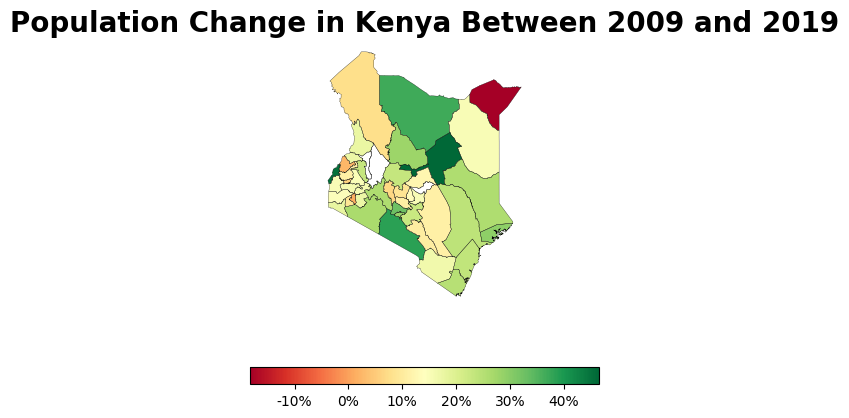

In [ ]:
kenya_counties.plot(ax=ax, column='pop_change')
ax = kenya_counties.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(15, 5))
kenya_counties.plot(ax=ax, column='pop_change', legend=True, cmap='RdYlGn', legend_kwds={'shrink':0.3,
 'orientation': 'horizontal', 'format': '%.0f%%'})
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)
ax.set_title('Population Change in Kenya Between 2009 and 2019', size=20, weight='bold')
plt.show


From the map above, it is evident that many counties in Kenya experience an increase in population by more than 20% except Mandera county that experienced a decline in population. It is worth noting that Mandera county borders Somalia and therefore is affected by insecurity and prolonged drought. Such population changes also reflect in schools.  

<Axes: >

[]

[]

<Axes: >

[]

[]

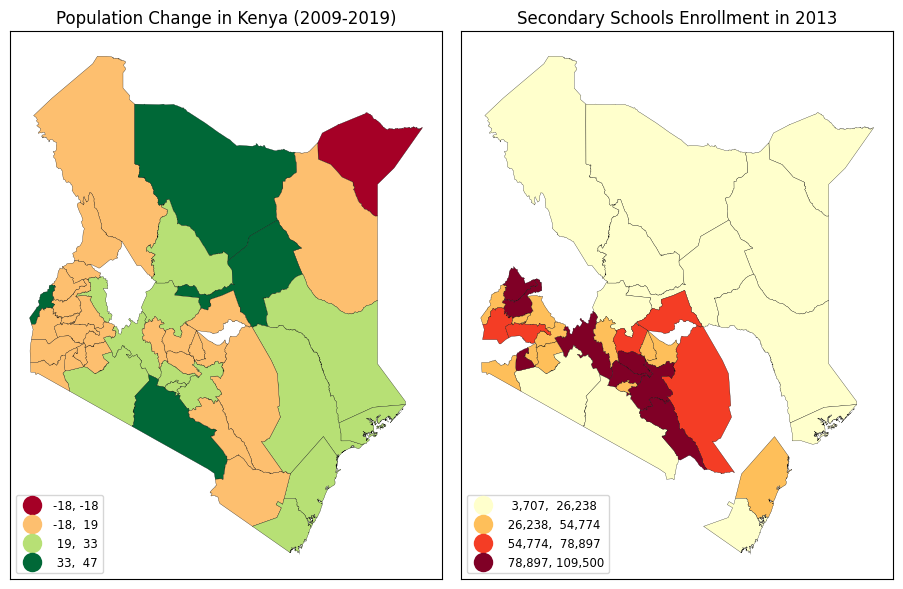

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,6),sharey=True, tight_layout=True)
kenya_counties.plot(ax=axs[0],column='pop_change',legend=True,cmap='RdYlGn',scheme='natural_breaks',k=4,
         edgecolor='black',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Population Change in Kenya (2009-2019)")
axs[0].set_xticks([]); axs[0].set_yticks([])

kenya_counties.plot(ax=axs[1],column='2013',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=4,
         edgecolor='black',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Secondary Schools Enrollment in 2013")
axs[1].set_xticks([]); axs[1].set_yticks([])

The population increase in 2019 in many counties in Kenya indicates explains the significant improvement in enrollments in secondary schools experienced in 2013. Generally, some counties are more populated than others and that explains why the disparities in enrollment rates among counties in 2013. Generally, central and eastern counties have a higher population and high enrolment rates because of the conducive climatic conditions that favor agriculture, trade and urbanization.      

<Axes: >

[]

[]

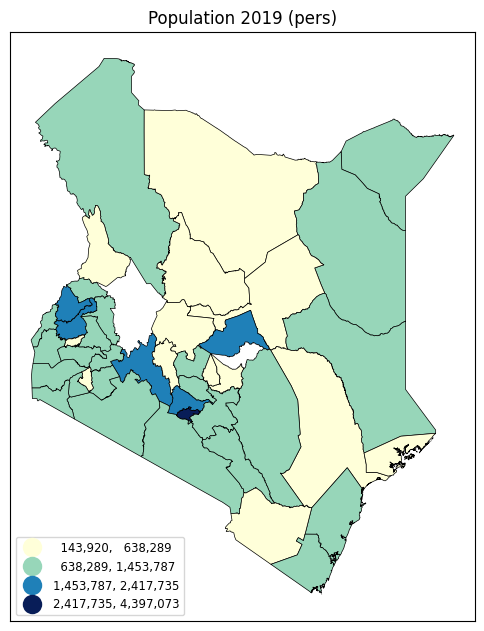

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
kenya_counties.plot(ax=ax,column='Total_Population19',legend=True,cmap='YlGnBu',scheme='natural_breaks',k=4,
         edgecolor='black',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #
ax.title.set_text("Population 2019 (pers)")
ax.set_xticks([]); ax.set_yticks([])

In [ ]:
#import numpy as np
kcP = kenya_counties.copy()
kcP["geometry"] = kcP["geometry"].centroid

<ipython-input-251-13ab0c171b5b>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  kcP["geometry"] = kcP["geometry"].centroid


<Axes: >

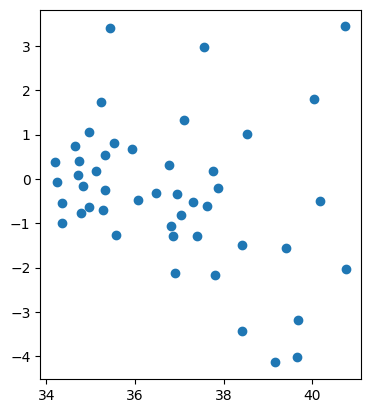

In [ ]:
kcP.plot()

The plot shows that many central and south Eastern counties have a significantly higher population that other counties.

<Axes: >

[]

[]

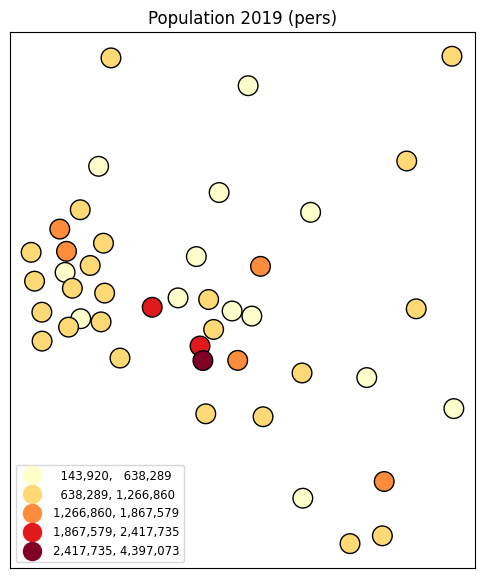

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
kcP.plot(ax=ax,column='Total_Population19',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #
ax.title.set_text("Population 2019 (pers)")
ax.set_xticks([]); ax.set_yticks([])

In [ ]:
kenya_pop.dtypes

County                 object
Total_Population09      int64
Total_Population19      int64
LandArea                int64
Population_Density      int64
pop_change            float64
dtype: object

<Axes: >

<Axes: >

[]

[]

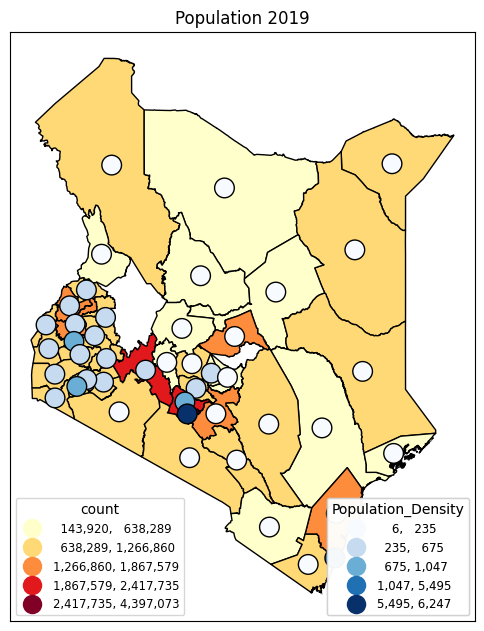

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
kenya_counties.plot(ax=ax,column='Total_Population19',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''count''')

kcP.plot(ax=ax,column='Population_Density',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #

ax.title.set_text("Population 2019")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''density''')



ax.add_artist(l2)
ax.add_artist(l1)
l2.set_title('''Population_Density''')


Nairobi county, the capital city of Kenya and counties bordering the Lake Victoria region are densely populated compared to other counties.    

credit_license.txt			ken_admbnda_adm2_iebc_20191031.shx
drive					ken_admbndl_admALL_iebc_itos_20191031.CPG
ken_admbnda_adm0_iebc_20191031.sbn	ken_admbndp_admALL_iebc_itos_20191031.sbn
ken_admbnda_adm0_iebc_20191031.sbx	ken_admbndp_admALL_iebc_itos_20191031.sbx
ken_admbnda_adm0_iebc_20191031.shp	ken_admbndt_adminUnitLookup.dbf
ken_admbnda_adm0_iebc_20191031.shp.xml	kenya_administrative_province_boundaries.dbf
ken_admbnda_adm0_iebc_20191031.shx	kenya_administrative_province_boundaries.shp
ken_admbnda_adm1_iebc_20191031.CPG	kenya_administrative_province_boundaries.shx
ken_admbnda_adm1_iebc_20191031.dbf	kenya_administrative_province_boundaries.zip
ken_admbnda_adm1_iebc_20191031.prj	kenya_boundaries.zip
ken_admbnda_adm1_iebc_20191031.sbn	kenya_counties.zip
ken_admbnda_adm1_iebc_20191031.sbx	kenya_county_boundary.cst
ken_admbnda_adm1_iebc_20191031.shp	kenya_county_boundary.dbf
ken_admbnda_adm1_iebc_20191031.shp.xml	kenya_county_boundary.prj
ken_admbnda_adm1_iebc_20191031.shx	kenya_county_bo

<Axes: >

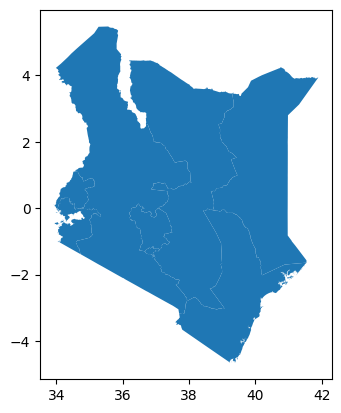

In [ ]:
! wget -q -O kenya_prov.zip 'https://github.com/Brian13Noble/GIS/blob/main/kenya_administrative_province_boundaries.shp.zip.zip' #aok: error: was nj_counties
!ls
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Datasets/kenya_administrative_province_boundaries.shp.zip.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
kenya_prov=gpd.read_file('kenya_administrative_province_boundaries.shp') #load the shapefile with gpd as kenya_counties
#Make the map
kenya_prov.plot()

In [ ]:
#kenya_counties.dtypes

<Axes: >

<Axes: >

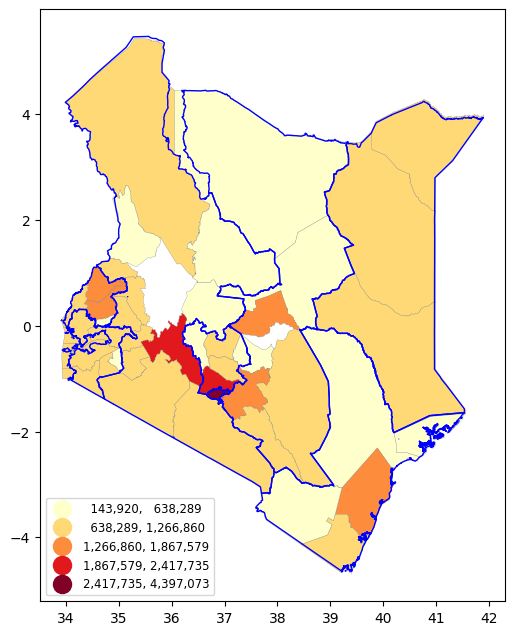

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
kenya_counties.plot(ax=ax,column='Total_Population19',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
kenya_prov.plot(ax=ax,edgecolor='blue',linewidth=1, facecolor="none") #alpha=0.1)

From the map above the coast, central, and Nyanza region are densely populated. Generally, over the past 10 years, Kenya's population has grown significantly and that has resulted to the improvement of the economy. However, the distribution of the Kenyan population is affected maainly by climatic conditions, security, employment opportunities, availability of food and water, among others. Importantly, the downsides of population growth are experienced in learning institutions. While there are many learners joining primary, secondary and university institutions, the county and national governments are striving to improve the quality of education. The primaryc challenge therefore facing the CBC education system in Kenya is scarcity of resources accelerated by growth of population that increases significantly the enrollment rates.

** Resources **
https://data.humdata.org/dataset/kenya-population-per-county-from-census-report-2019?

https://www.knbs.or.ke/data-tables/

https://map.igismap.com/gis-data/kenya/administrative_national_boundary

https://data.world/

